In [25]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("max_colwidth", 200)

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os.path
import fuzzywuzzy as fz
import googletrans as gtr
import translate as tr
import langdetect as ld
import scipy as sp

os.getcwd()

from hyperopt import hp

import optuna

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

from sklearn.dummy import DummyRegressor

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

import xgboost

from numpy import asarray

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn import datasets

import timeit

from sklearn import metrics

import shap
import lime.lime_tabular

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

from sklearn import decomposition


In [26]:
# customers informations (keys : zip_code_prefix, customer_id):
df_customer_unique_id2 = pd.read_csv('P5_Modelisation.csv')

In [27]:
df_customer_unique_id2.columns

to_drop=['Unnamed: 0']

df_customer_unique_id2=df_customer_unique_id2.drop(to_drop,axis='columns')

# Clustering

In [30]:
to_drop=['key_0']

df_customer_unique_id2=df_customer_unique_id2.drop(to_drop,axis='columns')

In [31]:
list_ACP=['boleto', 'credit_card', 'debit_card', 'voucher','Auto_Construction_Tools_Security_Work', 
          'Books_CD_DVD_Music_Art_Party', 'Electronic', 
    'Healthcare_Baby_Fashion', 'Home_Food_Drink',
'RFM_Score','NE','NW','SE','SW']

list_ACP2=['Home_Food_Drink','Electronic','RFM_Score','NE','NW','SE','SW']

list_ACP0=['RFM_Score','NE','NW','SE','SW']


# We'll choose the following one :

#list_ACP3=['Auto_Construction_Tools_Security_Work', 
#          'Books_CD_DVD_Music_Art_Party', 'Electronic', 
#    'Healthcare_Baby_Fashion', 'Home_Food_Drink',
#'RFM_Score']



#list_ACP3=['Récence','Fréquence','Monetary','nb_order_by_customers','payment_installments','days_from_last_command_nb','price_per_customer']


list_ACP3=['nb_order_by_customers','payment_installments','days_from_last_command_nb','price_per_customer',
           'review_score','delivery_delay_number']


#list_ACP3=['Récence','Fréquence','Monetary','nb_order_by_customers','payment_installments']


list_ACP4=['Auto_Construction_Tools_Security_Work', 
          'Books_CD_DVD_Music_Art_Party', 'Electronic', 
   'Healthcare_Baby_Fashion', 'Home_Food_Drink',
'Récence','Fréquence','Monetary']



# k_means scenario 1 (list ACP3)

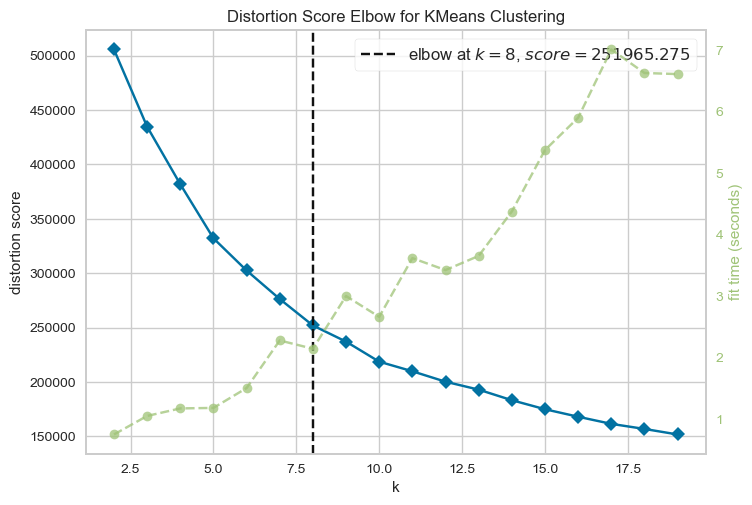

63.47923400000218


In [52]:
# silhouette score too slow.
# we'll take a 25% random sample.
# df.sample(frac=0.5, replace=True, random_state=1)

df_customer_unique_id3=df_customer_unique_id2.sample(frac=0.25, random_state=1)

from sklearn.cluster import KMeans

data_pca = df_customer_unique_id2[list_ACP3]         # rappel : df_customer_unique_id3: a 25% random sample of df_customer_unique_id2.


X = data_pca.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


kmeans = KMeans(n_clusters=10, random_state=0,init='random').fit(X)

kmeans.labels_


#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

ar = kmeans.predict(X)
#score(X, y=None, sample_weight=None)


# clusters centers 

kmeans.cluster_centers_


# Which k do we have to choose ?

start_time = timeit.default_timer()

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer



# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

elapsed = timeit.default_timer() - start_time

print(elapsed)

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in [5,6,7,8]:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 5, silhouette score is 0.4297648674345911)
For n_clusters = 6, silhouette score is 0.4458560175652687)
For n_clusters = 7, silhouette score is 0.44538397859387285)
For n_clusters = 8, silhouette score is 0.38511629477394554)


In [44]:
# full df :

data_pca_full = df_customer_unique_id2[list_ACP3]


X_full = data_pca_full.values
std_scale = preprocessing.StandardScaler().fit(X_full)
X_scaled_full = std_scale.transform(X_full)



# from silhouette_score, best k in n_clusters

kmeans = KMeans(n_clusters=6, random_state=0,init='random').fit(X_scaled_full)

kmeans.labels_


#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

ar = kmeans.predict(X_scaled_full)
#score(X, y=None, sample_weight=None)


df=pd.DataFrame(ar)
df['customer_unique_id']=df_customer_unique_id2['customer_unique_id']

df_tests=df_customer_unique_id2.merge(df,on='customer_unique_id',how='left')

df_tests.rename(columns={0:'category_KMeans'},inplace=True)

#df_geolocation.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)


df_tests



,first_order,customer_unique_id,customer_code_prefix,customer_city,customer_state,payment_installments,nb_of_items,boleto,credit_card,debit_card,voucher,price_per_customer,Auto_Construction_Tools_Security_Work,Books_CD_DVD_Music_Art_Party,Electronic,Healthcare_Baby_Fashion,Home_Food_Drink,nb_order_by_customers,last_purchase,order_id,review_score,delivery_delay_number,geolocation_lat_x,geolocation_lng_x,geolocation_city_x,geolocation_state_x,LAT,LNG,GEO,first_order_date_2,last_order_date_2,Récence,Fréquence,Monetary,days_from_last_command,RFM_Cell,RFM_Score,geolocation_lat_y,geolocation_lng_y,geolocation_city_y,geolocation_state_y,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,NE,NW,SE,SW,"R,F,M",Segmentation,Segmentation_class,days_from_last_command_nb,product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts,category_KMeans
0,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,69923a4e07ce446644394df37a710286,5,1.0,-23.576983,-46.587161,sao paulo,SP,S,E,SE,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,-23.576983,-46.587161,sao paulo,SP,0,0,1,0,"2,2,2",A_risque,4,331.0,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,69923a4e07ce446644394df37a710286,5,1.0,-23.576983,-46.587161,sao paulo,SP,S,E,SE,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,-23.576983,-46.587161,sao paulo,SP,0,0,1,0,"2,2,2",A_risque,4,331.0,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,69923a4e07ce446644394df37a710286,5,1.0,-23.576983,-46.587161,sao paulo,SP,S,E,SE,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,-23.576983,-46.587161,sao paulo,SP,0,0,1,0,"2,2,2",A_risque,4,331.0,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,69923a4e07ce446644394df37a710286,5,1.0,-23.576983,-46.587161,sao paulo,SP,S,E,SE,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,-23.576983,-46.587161,sao paulo,SP,0,0,1,0,"2,2,2",A_risque,4,331.0,housewares,0,0,0,0,0,0,0,0,0,0,0,0

In [45]:
df_customer_unique_sorted=df_tests.sort_values(by=['category_KMeans'])
df_customer_unique_sorted

,first_order,customer_unique_id,customer_code_prefix,customer_city,customer_state,payment_installments,nb_of_items,boleto,credit_card,debit_card,voucher,price_per_customer,Auto_Construction_Tools_Security_Work,Books_CD_DVD_Music_Art_Party,Electronic,Healthcare_Baby_Fashion,Home_Food_Drink,nb_order_by_customers,last_purchase,order_id,review_score,delivery_delay_number,geolocation_lat_x,geolocation_lng_x,geolocation_city_x,geolocation_state_x,LAT,LNG,GEO,first_order_date_2,last_order_date_2,Récence,Fréquence,Monetary,days_from_last_command,RFM_Cell,RFM_Score,geolocation_lat_y,geolocation_lng_y,geolocation_city_y,geolocation_state_y,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,NE,NW,SE,SW,"R,F,M",Segmentation,Segmentation_class,days_from_last_command_nb,product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts,category_KMeans
54117,2017-11-06 20:41:44,3abcdd9f2adabfc152ffc2c348ab5644,7115,guarulhos,SP,10.0,1.0,0,1,0,0,157.21,0,1,0,0,0,1,2017-11-06 20:41:44,52fb2336bbf199586136afbe9822086c,5,3.0,-23.450764,-46.532905,guarulhos,SP,S,E,SE,2017-11-06,2017-11-06,2,1,3,296 days,"2,1,3",2.000000,-23.450764,-46.532905,guarulhos,SP,-23.450764,-46.532905,guarulhos,SP,0,0,1,0,"2,1,3",A_risque,4,296.0,cool_stuff,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68898,2018-01-17 09:31:07,1fbd81e4d0a0cf9125ca038b43533b7f,28500,cantagalo,RJ,7.0,1.0,0,2,0,1,157.67,0,0,0,0,2,2,2018-02-15 21:15:26,73696c4354b75af323cf793aa474acfc,4,11.0,-21.974364,-42.354218,cantagalo,RJ,N,E,NE,2018-01-17,2018-02-15,3,2,3,195 days,"3,2,3",2.666667,-21.974364,-42.354218,cantagalo,RJ,-21.974364,-42.354218,cantagalo,RJ,1,0,0,0,"3,2,3",Champions,0,195.0,furniture_decor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68897,2018-01-17 09:31:07,1fbd81e4d0a0cf9125ca038b43533b7f,28500,cantagalo,RJ,7.0,1.0,0,2,0,1,157.67,0,0,0,0,2,2,2018-02-15 21:15:26,73696c4354b75af323cf793aa474acfc,4,11.0,-21.974364,-42.354218,cantagalo,RJ,N,E,NE,2018-01-17,2018-02-15,3,2,3,195 days,"3,2,3",2.666667,-21.974364,-42.354218,cantagalo,RJ,-21.974364,-42.354218,cantagalo,RJ,1,0,0,0,"3,2,3",Champions,0,195.0,furniture_decor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68896,2018-01-17 09:31:07,1fbd81e4d0a0cf9125ca038b43533b7f,28500,cantagalo,RJ,7.0,1.0,0,2,0,1,157.67,0,0,0,0,2,2,2018-02-15 21:15:26,73696c4354b75af323cf793aa474acfc,4,11.0,-21.974364,-42.354218,cantagalo,RJ,N,E,NE,2018-01-17,2018-02-15,3,2,3,195 days,"3,2,3",2.666667,-21.974364,-42.354218,cantagalo,RJ,-21.974364,-42.354218,cantagalo,RJ,1,0,0,0,"3,2,3",Champions,0,

# DBSCAN scenario 1 (list ACP3)

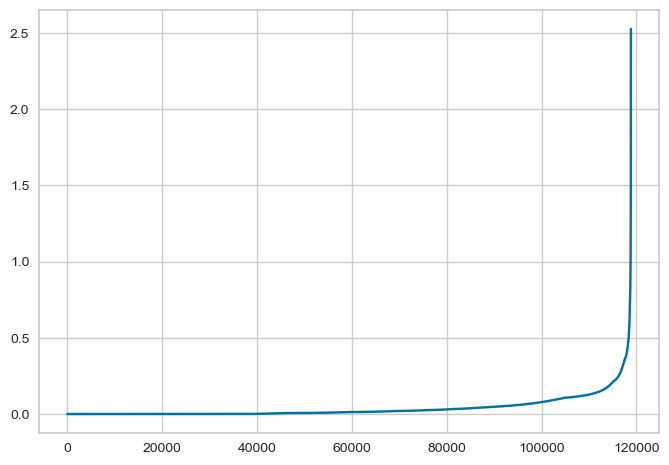

In [12]:
data_pca_full = df_customer_unique_id2[list_ACP3]


X_full = data_pca_full.values
std_scale = preprocessing.StandardScaler().fit(X_full)
X_scaled_full = std_scale.transform(X_full)


from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled_full)
distances, indices = nbrs.kneighbors(X_scaled_full)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);
plt.show()

In [14]:
from sklearn.cluster import DBSCAN


epsilons=[0.01,0.05,0.1,0.5]
#epsilons=[0.9]

for i in epsilons :
    start_time = timeit.default_timer()
    y_pred = DBSCAN(eps = i, min_samples=5).fit_predict(X_scaled_full)
    df_dbs_2=pd.DataFrame(y_pred,columns=['y_pred'])
    print(i)
    print(df_dbs_2.max()-df_dbs_2.min())
    elapsed = timeit.default_timer() - start_time
    print(elapsed)


0.01
y_pred    1452
dtype: int64
4.037280500000634
0.05
y_pred    2704
dtype: int64
5.368232900000294
0.1
y_pred    2970
dtype: int64
6.642780000001949
0.5
y_pred    514
dtype: int64
31.05345010000019


In [12]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled_full)
X_projected = pca.transform(X_scaled_full)

In [13]:
X_projected[:,0]

array([ 0.89865031, -0.67712431, -0.12723919, ...,  0.67934   ,
        1.22426073, -0.73924116])

In [14]:
y_pred.shape

(92001,)

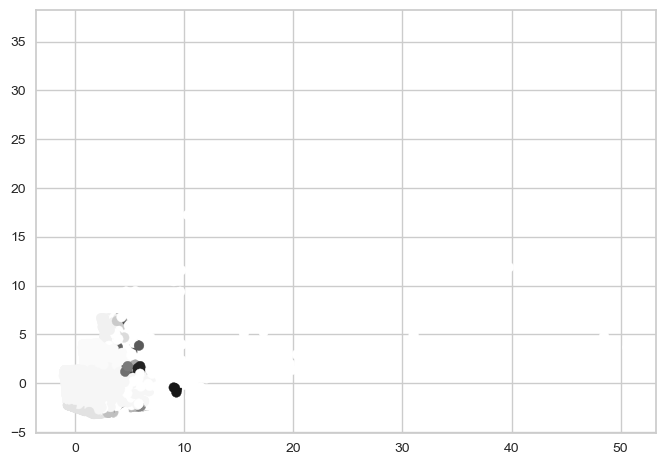

In [15]:
plt.scatter(X_projected[:,0],X_projected[:,1],c = y_pred);
plt.show(block=False)
plt.show()


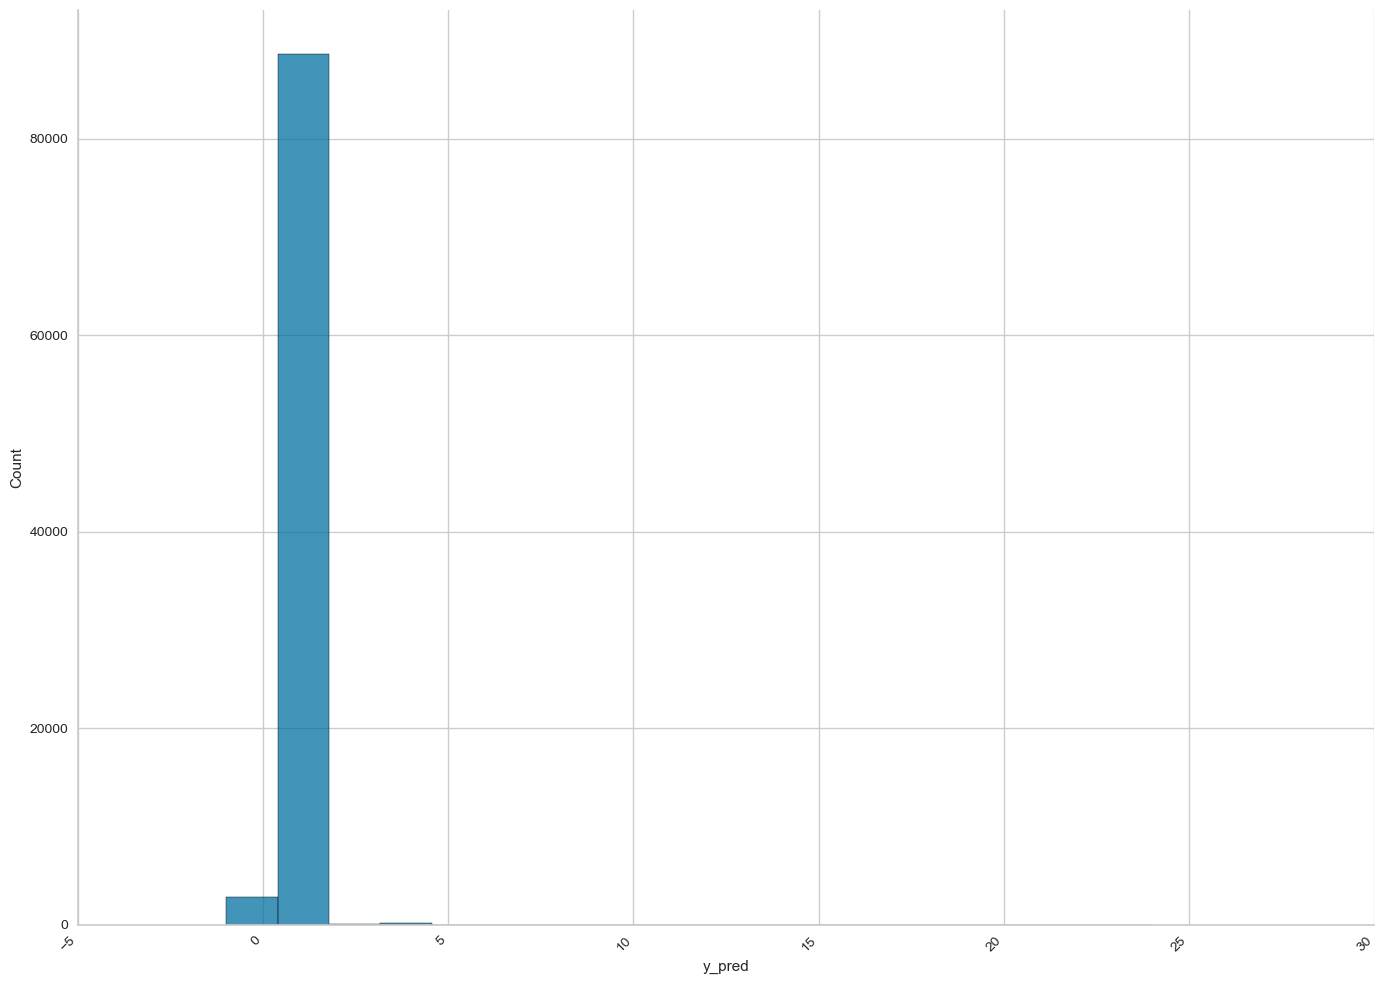

In [16]:
b=sns.displot(data=df_dbs_2['y_pred'],height=10, aspect=14/10)
b.set_xticklabels(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ACP scenario 1 (list ACP3) _ KMeans

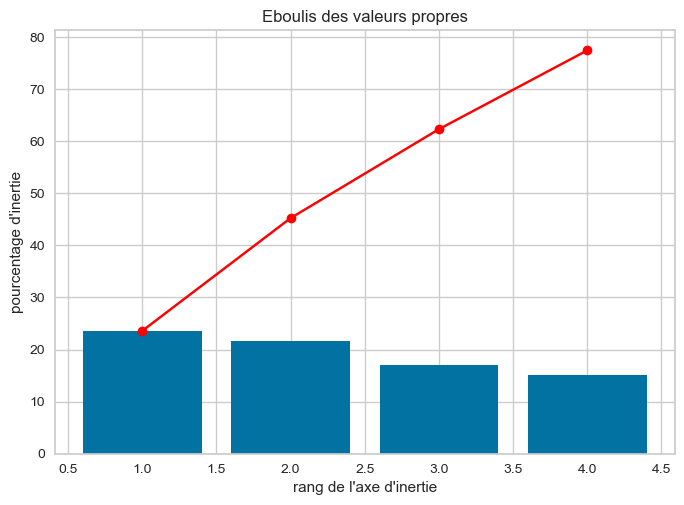

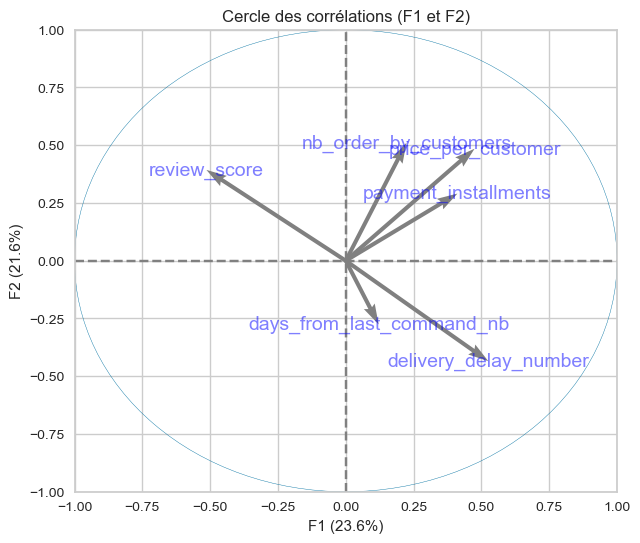

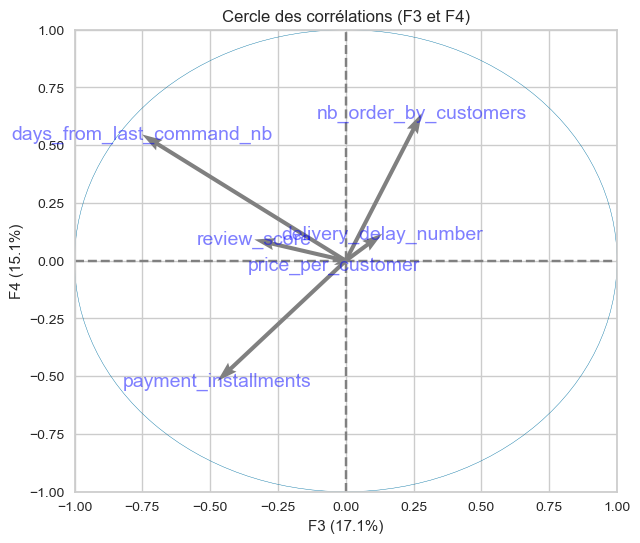

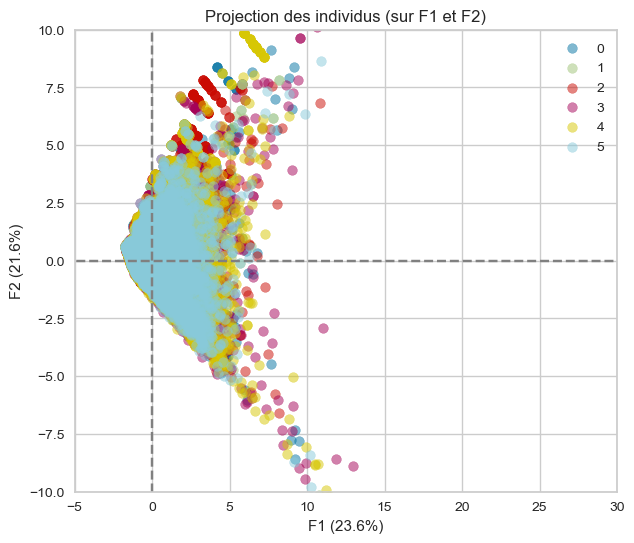

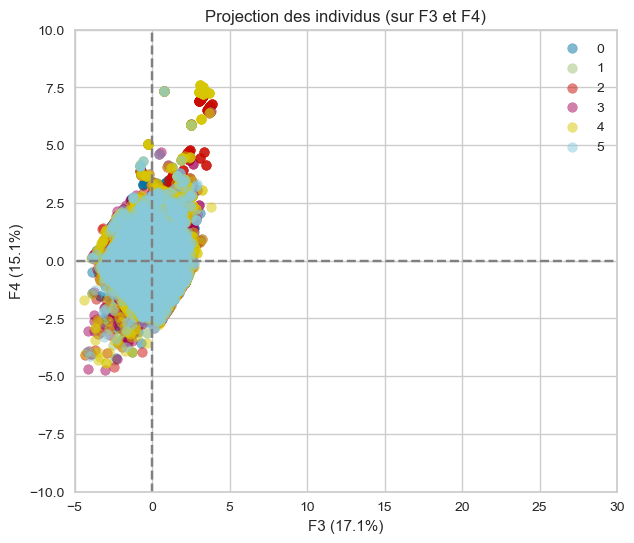

In [46]:
from sklearn import decomposition
from sklearn import preprocessing
from functions_Copy2 import *

# choix du nombre de composantes à calculer
n_comp =4

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_customer_unique_id2[list_ACP3]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = df_customer_unique_id2[list_ACP3].index # ou data.index pour avoir les intitulés
features = df_customer_unique_id2[list_ACP3].columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))



### Projection des individus
#X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

#plt.show()

# Category :
category = [df_tests.loc[Id, 'category_KMeans'] for Id in data_pca.index]



# Projection des individus

centers = kmeans.cluster_centers_

X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = category, alpha = 0.5)

display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = category, alpha = 0.5)




# ACP scenario 1 (list ACP3) _ t_sne

In [38]:
X_scaled_full.shape

(99926, 6)

In [39]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_scaled_full)
X_embedded.shape



KeyboardInterrupt: 

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

X = X_scaled_full
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=3000, init='pca')
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.show()

KeyboardInterrupt: 

In [43]:
df_embedding_tsne=pd.DataFrame(X_embedded)


X = X_embedded.copy()
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


# from silhouette_score, best k in n_clusters

kmeans = KMeans(n_clusters=6, random_state=0,init='random').fit(X)


ar_tsne = kmeans.predict(X)


df_tsne = pd.DataFrame(ar_tsne)

# df_result_tsne = df1.merge(df_tsne,on=df1.index,how='left')

# df_result_tsne.rename(columns={0:'category_KMeans'},inplace=True)


# df_result_tsne.head(5)

NameError: name 'X_embedded' is not defined

In [ ]:
emb_tsne = pd.DataFrame(X_embedded)
emb_tsne_km = emb_tsne.merge(df_tsne,on=emb_tsne.index,how='left')
emb_tsne_km

emb_tsne_km.drop(['key_0'], axis=1, inplace=True)
emb_tsne_km.rename(columns={'0_x':'x_1'},inplace=True)
emb_tsne_km.rename(columns={1:'x_2'},inplace=True)
emb_tsne_km.rename(columns={'0_y':'y'},inplace=True)

# Boxplots scenario 1 (list ACP3)


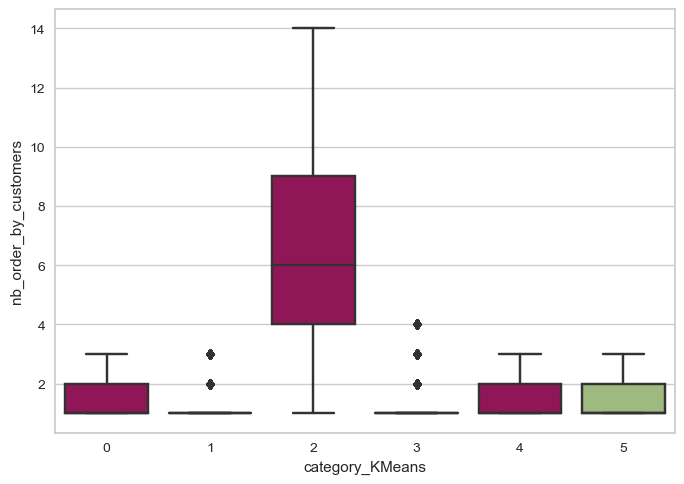

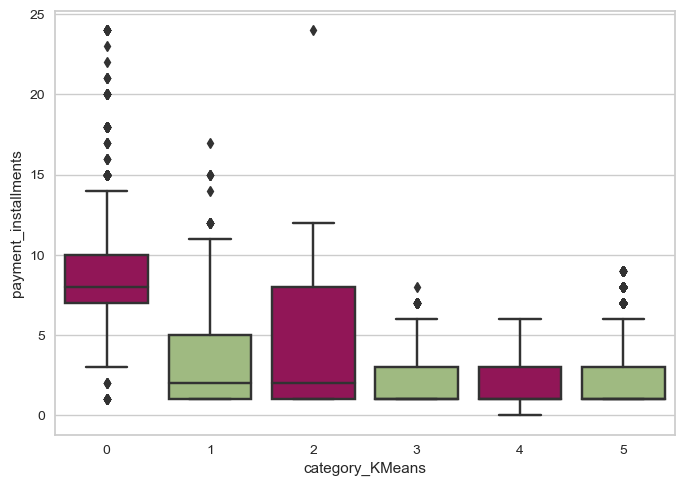

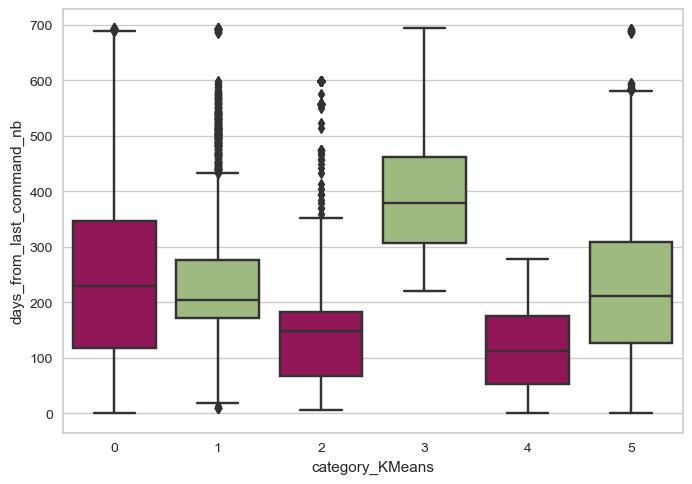

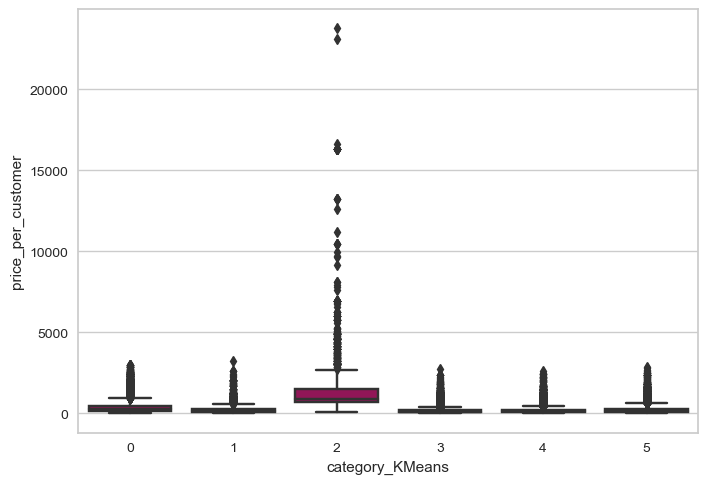

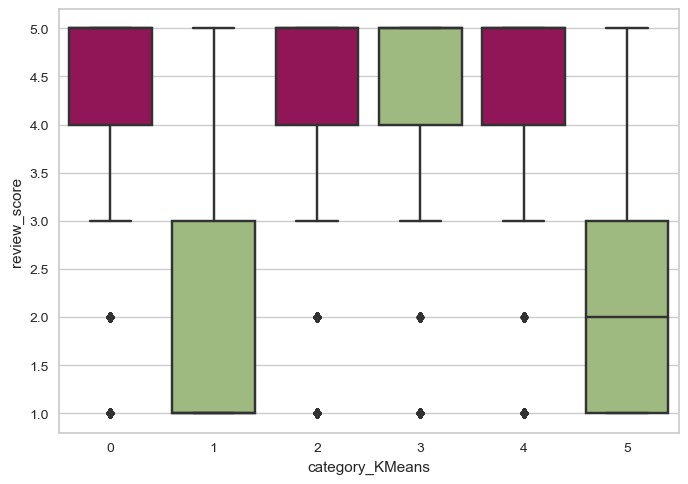

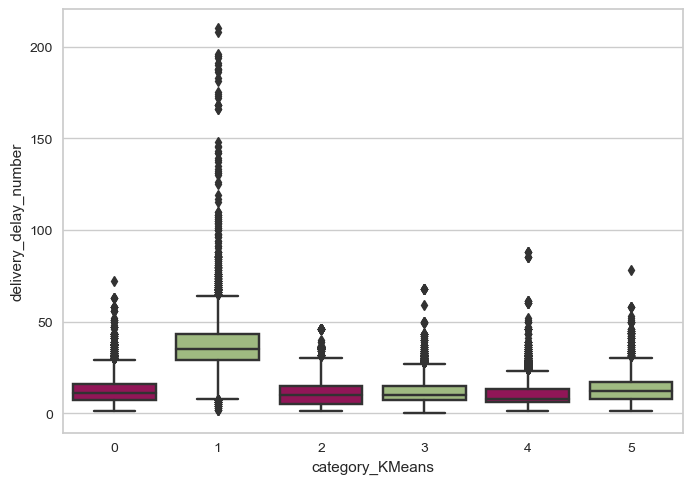

In [47]:
#Faire des boxplots de l'évolution des différentes variables de liste ACP 3 en fonction de la category de client

liste_alpha=[0,1,2,3,4,5]

yk=list_ACP3

for i in yk:
    sns.boxplot(x='category_KMeans',y=i,palette=["m", "g"],order=liste_alpha,
            data=df_tests)

    plt.show()

    

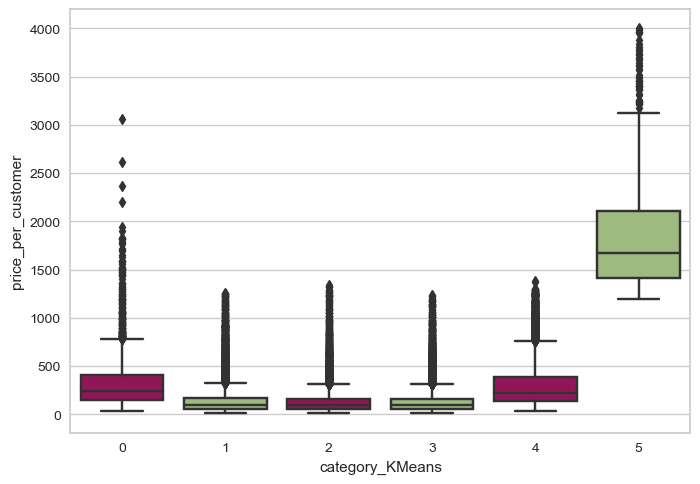

In [21]:
sns.boxplot(x='category_KMeans',y='price_per_customer',palette=["m", "g"],order=liste_alpha,
            data=df_tests[df_tests['price_per_customer']<4000])

plt.show()

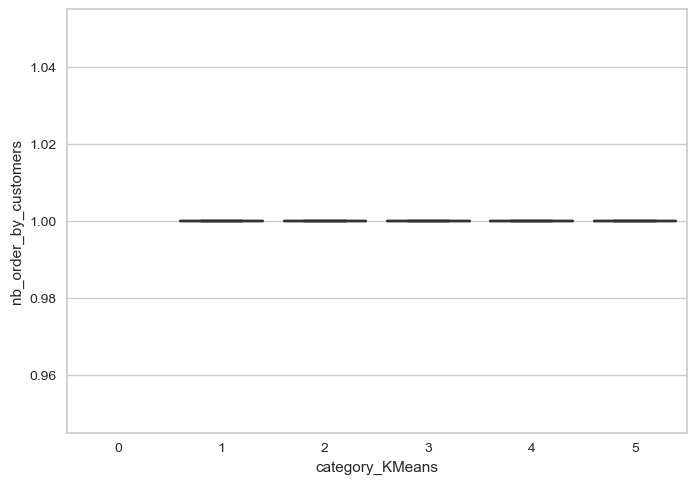

In [22]:
sns.boxplot(x='category_KMeans',y='nb_order_by_customers',palette=["m", "g"],order=liste_alpha,
            data=df_tests[df_tests['nb_order_by_customers']<2])

plt.show()

In [23]:
df_tests

,first_order,customer_unique_id,customer_code_prefix,customer_city,customer_state,payment_installments,nb_of_items,boleto,credit_card,debit_card,voucher,price_per_customer,Auto_Construction_Tools_Security_Work,Books_CD_DVD_Music_Art_Party,Electronic,Healthcare_Baby_Fashion,Home_Food_Drink,nb_order_by_customers,last_purchase,first_order_date_2,last_order_date_2,Récence,Fréquence,Monetary,days_from_last_command,RFM_Cell,RFM_Score,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT,LNG,GEO,NE,NW,SE,SW,"R,F,M",Segmentation,Segmentation_class,days_from_last_command_nb,category_KMeans
0,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,S,E,SE,0,0,1,0,"2,2,2",A_risque,4,331.0,0
1,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,1.0,1,0,0,0,141.46,0,0,0,1,0,1,2018-07-26 03:24:27,2018-07-26,2018-07-26,4,1,3,34 days,"4,1,3",2.666667,-12.177924,-44.660711,barreiras,BA,N,E,NE,1,0,0,0,"4,1,3",Recent,2,34.0,1
2,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,3.0,1.0,0,1,0,0,179.12,1,0,0,0,0,1,2018-08-08 08:55:23,2018-08-08,2018-08-08,4,1,3,21 days,"4,1,3",2.666667,-16.745150,-48.514783,vianopolis,GO,N,W,NW,0,1,0,0,"4,1,3",Recent,2,21.0,1
3,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,1.0,0,1,0,0,72.20,0,0,0,0,1,1,2017-11-18 19:45:59,2017-11-18,2017-11-18,2,1,2,284 days,"2,1,2",1.666667,-5.774190,-35.271143,sao goncalo do amarante,RN,N,E,NE,1,0,0,0,"2,1,2",A_risque,4,284.0,3
4,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,1.0,0,1,0,0,28.62,0,1,0,0,0,1,2018-02-13 22:20:29,2018-02-13,2018-02-13,3,1,1,197 days,"3,1,1",1.666667,-23.676370,-46.514627,santo andre,SP,S,E,SE,0,0,1,0,"3,1,1",Recent,2,197.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91996,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,3.0,1.0,0,1,0,0,85.08,0,0,0,1,0,1,2017-03-09 09:54:05,2017-03-09,2017-03-09,1,1,2,538 days,"1,1,2",1.333333,-23.178000,-45.883818,são josé dos campos,SP,S,E,SE,0,0,1,0,"1,1,2",Lost,5,538.0,2
91997,2018-02-06 13:10:37,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,3.0,1.0,0,1,0,0,195.00,0,0,0,1,0,1,2018-02-06 13:10:37,2018-02-06,2018-02-06,3,1,4,204 days,"3,1,4",2.666667,-24.001500,-46.449864,praia grande,SP,S,E,SE,0,0,1,0,"3,1,4",Prometteurs,3,204.0,3
91998,2017-08-27 15:04:16,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,5.0,1.0,0,1,0,0,271.01,0,0,0,0,1,1,2017-08-27 15:04:16,2017-08-27,2017-08-27,1,1,4,367 days,"1,1,4",2.000000,-17.898358,-39.373630,nova vicosa,BA,N,E,NE,1,0,0,0,"1,1,4",Lost,5,367.0,2
91999,2018-01-08 21:36:21,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,4.0,2.0,0,2,0,0,661.74,0,0,2,0,0,1,2018-01-08 21:36:21,2018-01-08,2018-01-08,2,1,4,233 days,"2,1,4",2.333333,-22.562825,-42.694574,japuiba,RJ,S,E,SE,0,0,1,0,"2,1,4",A_risque,4,233.0,3


In [51]:
# let's get some stats :

for a in list_ACP3:
    print(a)
    for w in [0,1,2,3,4,5]:
        print(w)
        print(df_tests[df_tests['category_KMeans']==w][a].mean())

nb_order_by_customers
0
1.452356176601754
1
1.297882427307206
2
6.939204053063129
3
1.278046559280551
4
1.3579976939286709
5
1.3127243470726575
payment_installments
0
8.261879986125564
1
3.2650126422250314
2
4.26998200119992
3
2.0249018156981045
4
1.8611983618941592
5
2.39355118207699
days_from_last_command_nb
0
237.23641048510976
1
233.83486093552466
2
137.20238650756616
3
390.020149126302
4
116.66275694803387
5
227.89559351404876
price_per_customer
0
399.00010604033116
1
246.95660872313553
2
1083.39829611363
3
164.01845551823473
4
184.4881155818825
5
247.42655031563123
review_score
0
4.325801496457063
1
2.09070796460177
2
4.40850609959336
3
4.602766235983835
4
4.6648244602600295
5
1.9935635598465156
delivery_delay_number
0
12.036786128599855
1
37.41837740295159
2
11.238440081579274
3
11.435779081253541
4
9.845223403165036
5
12.753362330072392


In [25]:
for a in ['Récence','Fréquence','Monetary']:
    print(a)
    for w in [0,1,2,3,4,5,6]:
        print(w)
        print(df_tests[df_tests['category_KMeans']==w][a].mean())

Récence
0
2.6244460856720826
1
3.657525836488284
2
1.0047404063205418
3
2.255583656894525
4
2.452245701734454
5
2.5685071574642127
6
nan
Fréquence
0
2.0
1
1.0
2
1.0
3
1.0
4
1.0
5
1.0316973415132924
6
nan
Monetary
0
3.4741506646971936
1
2.3331286878815787
2
2.292099322799097
3
2.253838207530367
4
3.3636294781489053
5
4.0
6
nan


# k_means scenario 2 (list ACP4)

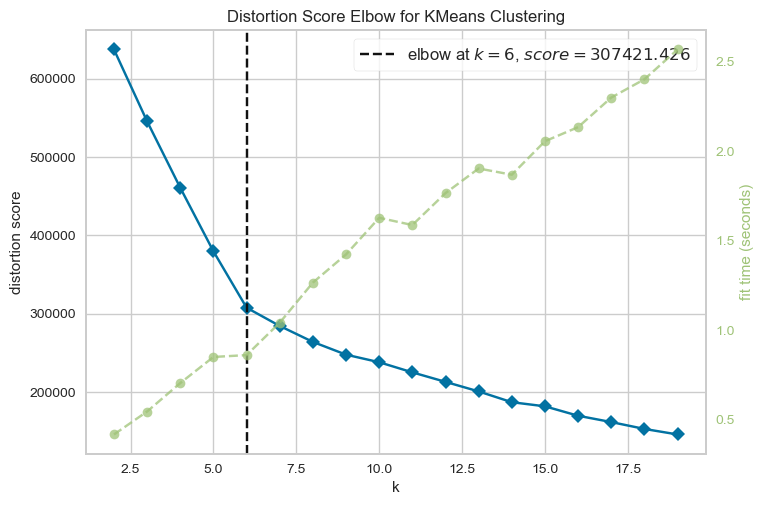

28.092410500000028


In [26]:
# silhouette score too slow.
# we'll take a 25% random sample.
# df.sample(frac=0.5, replace=True, random_state=1)

df_customer_unique_id3=df_customer_unique_id2.sample(frac=0.25, random_state=1)

from sklearn.cluster import KMeans

data_pca = df_customer_unique_id2[list_ACP4]         # rappel : df_customer_unique_id3: a 25% random sample of df_customer_unique_id2.


X = data_pca.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


kmeans = KMeans(n_clusters=10, random_state=0,init='random').fit(X_scaled)

kmeans.labels_


#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

ar = kmeans.predict(X_scaled)
#score(X, y=None, sample_weight=None)


# clusters centers 

kmeans.cluster_centers_


# Which k do we have to choose ?

start_time = timeit.default_timer()

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer



# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

elapsed = timeit.default_timer() - start_time

print(elapsed)

In [27]:
# full df :

data_pca_full = df_customer_unique_id2[list_ACP4]


X_full = data_pca_full.values
std_scale = preprocessing.StandardScaler().fit(X_full)
X_scaled_full = std_scale.transform(X_full)



# from silhouette_score, best k in n_clusters

kmeans = KMeans(n_clusters=6, random_state=0,init='random').fit(X_scaled_full)

kmeans.labels_


#kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

ar = kmeans.predict(X_scaled_full)
#score(X, y=None, sample_weight=None)


df=pd.DataFrame(ar)
df['customer_unique_id']=df_customer_unique_id2['customer_unique_id']

df_tests=df_customer_unique_id2.merge(df,on='customer_unique_id',how='left')

df_tests.rename(columns={0:'category'},inplace=True)

#df_geolocation.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)


df_tests



,first_order,customer_unique_id,customer_code_prefix,customer_city,customer_state,payment_installments,nb_of_items,boleto,credit_card,debit_card,voucher,price_per_customer,Auto_Construction_Tools_Security_Work,Books_CD_DVD_Music_Art_Party,Electronic,Healthcare_Baby_Fashion,Home_Food_Drink,nb_order_by_customers,last_purchase,first_order_date_2,last_order_date_2,Récence,Fréquence,Monetary,days_from_last_command,RFM_Cell,RFM_Score,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT,LNG,GEO,NE,NW,SE,SW,"R,F,M",Segmentation,Segmentation_class,days_from_last_command_nb,category
0,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,S,E,SE,0,0,1,0,"2,2,2",A_risque,4,331.0,0
1,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,1.0,1,0,0,0,141.46,0,0,0,1,0,1,2018-07-26 03:24:27,2018-07-26,2018-07-26,4,1,3,34 days,"4,1,3",2.666667,-12.177924,-44.660711,barreiras,BA,N,E,NE,1,0,0,0,"4,1,3",Recent,2,34.0,4
2,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,3.0,1.0,0,1,0,0,179.12,1,0,0,0,0,1,2018-08-08 08:55:23,2018-08-08,2018-08-08,4,1,3,21 days,"4,1,3",2.666667,-16.745150,-48.514783,vianopolis,GO,N,W,NW,0,1,0,0,"4,1,3",Recent,2,21.0,5
3,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,1.0,0,1,0,0,72.20,0,0,0,0,1,1,2017-11-18 19:45:59,2017-11-18,2017-11-18,2,1,2,284 days,"2,1,2",1.666667,-5.774190,-35.271143,sao goncalo do amarante,RN,N,E,NE,1,0,0,0,"2,1,2",A_risque,4,284.0,1
4,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,1.0,0,1,0,0,28.62,0,1,0,0,0,1,2018-02-13 22:20:29,2018-02-13,2018-02-13,3,1,1,197 days,"3,1,1",1.666667,-23.676370,-46.514627,santo andre,SP,S,E,SE,0,0,1,0,"3,1,1",Recent,2,197.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91996,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,3.0,1.0,0,1,0,0,85.08,0,0,0,1,0,1,2017-03-09 09:54:05,2017-03-09,2017-03-09,1,1,2,538 days,"1,1,2",1.333333,-23.178000,-45.883818,são josé dos campos,SP,S,E,SE,0,0,1,0,"1,1,2",Lost,5,538.0,4
91997,2018-02-06 13:10:37,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,3.0,1.0,0,1,0,0,195.00,0,0,0,1,0,1,2018-02-06 13:10:37,2018-02-06,2018-02-06,3,1,4,204 days,"3,1,4",2.666667,-24.001500,-46.449864,praia grande,SP,S,E,SE,0,0,1,0,"3,1,4",Prometteurs,3,204.0,4
91998,2017-08-27 15:04:16,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,5.0,1.0,0,1,0,0,271.01,0,0,0,0,1,1,2017-08-27 15:04:16,2017-08-27,2017-08-27,1,1,4,367 days,"1,1,4",2.000000,-17.898358,-39.373630,nova vicosa,BA,N,E,NE,1,0,0,0,"1,1,4",Lost,5,367.0,1
91999,2018-01-08 21:36:21,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,4.0,2.0,0,2,0,0,661.74,0,0,2,0,0,1,2018-01-08 21:36:21,2018-01-08,2018-01-08,2,1,4,233 days,"2,1,4",2.333333,-22.562825,-42.694574,japuiba,RJ,S,E,SE,0,0,1,0,"2,1,4",A_risque,4,233.0,3


In [28]:
df_customer_unique_sorted=df_tests.sort_values(by=['category'])
df_customer_unique_sorted

,first_order,customer_unique_id,customer_code_prefix,customer_city,customer_state,payment_installments,nb_of_items,boleto,credit_card,debit_card,voucher,price_per_customer,Auto_Construction_Tools_Security_Work,Books_CD_DVD_Music_Art_Party,Electronic,Healthcare_Baby_Fashion,Home_Food_Drink,nb_order_by_customers,last_purchase,first_order_date_2,last_order_date_2,Récence,Fréquence,Monetary,days_from_last_command,RFM_Cell,RFM_Score,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT,LNG,GEO,NE,NW,SE,SW,"R,F,M",Segmentation,Segmentation_class,days_from_last_command_nb,category
0,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,S,E,SE,0,0,1,0,"2,2,2",A_risque,4,331.0,0
18170,2017-10-09 11:14:08,dbdfcd1e9de47452f3c9b0229bc0edc3,37600,cambui,MG,5.0,1.0,0,2,0,0,287.80,0,0,0,0,2,2,2017-10-09 11:14:23,2017-10-09,2017-10-09,2,2,4,324 days,"2,2,4",2.666667,-22.611874,-46.058157,cambui,MG,S,E,SE,0,0,1,0,"2,2,4",A_risque,4,324.0,0
18163,2018-05-22 16:58:36,55f21db4f9a353dcee5b774f750c65a1,29240,alfredo chaves,ES,1.0,1.0,0,2,0,0,499.35,0,1,0,0,1,2,2018-06-03 12:50:18,2018-05-22,2018-06-03,4,2,4,87 days,"4,2,4",3.333333,-20.627032,-40.749311,alfredo chaves,ES,N,E,NE,1,0,0,0,"4,2,4",Champions,0,87.0,0
18138,2018-01-06 09:53:31,75a2adfe9f86d401f24b5fe2eb9a582c,12951,atibaia,SP,1.0,3.0,0,0,0,12,603.98,0,0,0,0,4,2,2018-01-06 09:56:20,2018-01-06,2018-01-06,2,2,4,235 days,"2,2,4",2.666667,-23.124377,-46.582792,atibaia,SP,S,E,SE,0,0,1,0,"2,2,4",A_risque,4,235.0,0
18116,2018-02-23 14:15:31,28dd1607a5e16ed5458919c2afca6476,78740,rondonopolis,MT,4.0,1.0,0,2,0,0,166.62,0,0,0,0,2,2,2018-02-23 14:15:47,2018-02-23,2018-02-23,3,2,3,187 days,"3,2,3",2.666667,-16.475636,-54.616900,rondonopolis,MT,N,W,NW,0,1,0,0,"3,2,3",Champions,0,187.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60752,2018-05-12 16:50:35,b43b320680e738c94f4692799dad0d92,11619,sao sebastiao,SP,1.0,1.0,0,1,0,0,77.69,1,0,0,0,0,1,2018-05-12 16:50:35,2018-05-12,2018-05-12,4,1,2,109 days,"4,1,2",2.333333,-23.774653,-45.636554,sao sebastiao,SP,S,E,SE,0,0,1,0,"4,1,2",Recent,2,109.0,5
14315,2018-08-07 06:15:13,70af4c53ef8785a916deae4611f1ad24,89610,herval d'oeste,SC,1.0,6.0,6,0,0,0,1291.29,6,0,0,0,0,1,2018-08-07 06:15:13,2018-08-07,2018-08-07,4,1,4,22 days,"4,1,4",3.000000,-27.173581,-51.492621,herval d'oeste,SC,S,W,SW,0,0,0,1,"4,1,4",Prometteurs,3,22.0,5
60748,2018-03-16 20:28:10,45f418d424cb65a619c35f72cc82f8bf,3572,sao paulo,SP,2.0,1.0,0,1,0,0,102.85,1,0,0,0,0,1,2018-03-16 20:28:10,2018-03-16,2018-03-16,3,1,2,166 days,"3,1,2",2.000000,-23.574836,-46.496809,sao paulo,SP,S,E,SE,0,0,1,0,"3,1,2",Recent,2,166.0,5
14359,2018-05-12 19:35:22,94626dc780fb071c48037a719449bf98,18135,sao roque,SP,8.0,1.0,0,1,0,0,157.73,1,0,0,0,0,1,2018-05-12 19:35:22,2018-05-12,2018-05-12,4,1,3,109 days,"4,1,3",2.666667,-23.547386,-47.121992,sao roque,SP,S,W,SW,0,0,0,1,"4,1,3",Recent,2,109.0,5


In [29]:
df_customer_unique_id2.describe()

,customer_code_prefix,payment_installments,nb_of_items,boleto,credit_card,debit_card,voucher,price_per_customer,Auto_Construction_Tools_Security_Work,Books_CD_DVD_Music_Art_Party,Electronic,Healthcare_Baby_Fashion,Home_Food_Drink,nb_order_by_customers,Récence,Fréquence,Monetary,RFM_Score,geolocation_lat,geolocation_lng,NE,NW,SE,SW,Segmentation_class,days_from_last_command_nb
count,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,91752.000000,91752.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000,92001.000000
mean,35221.658808,2.904099,1.144661,0.239323,0.909088,0.017587,0.065325,185.257301,0.092456,0.152824,0.190759,0.346985,0.396713,1.033097,2.503842,1.029771,2.500223,2.011279,-21.190166,-46.183545,0.230584,0.148292,0.269410,0.351714,3.394333,236.233758
std,29831.168744,2.698419,0.543216,0.569521,0.724401,0.152499,0.554482,323.971894,0.368658,0.402861,0.487966,0.578869,0.711755,0.206898,1.120321,0.169957,1.117996,0.540926,5.613724,4.056949,0.421209,0.355391,0.443656,0.477508,1.240350,152.549415
min,1003.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.590000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-33.689948,-72.668881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11410.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,63.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.666667,-23.589855,-48.119196,0.000000,0.000000,0.000000,0.000000,2.000000,113.000000
50%,24451.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,111.330000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,3.000000,2.000000,-22.924015,-46.631968,0.000000,0.000000,0.000000,0.000000,3.000000,217.000000
75%,59064.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,194.910000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,1.000000,4.000000,2.333333,-20.138476,-43.612351,0.000000,0.000000,1.000000,1.000000,4.000000,344.000000
max,99980.000000,24.000000,21.000000,20.000000,24.000000,7.000000,75.000000,23759.400000,20.000000,12.000000,24.000000,21.000000,18.000000,14.000000,4.000000,2.000000,4.000000,3.333333,42.184003,-8.723762,1.000000,1.000000,1.000000,1.000000,5.000000,694.000000


In [30]:
df_tests[df_tests['category']==0]

,first_order,customer_unique_id,customer_code_prefix,customer_city,customer_state,payment_installments,nb_of_items,boleto,credit_card,debit_card,voucher,price_per_customer,Auto_Construction_Tools_Security_Work,Books_CD_DVD_Music_Art_Party,Electronic,Healthcare_Baby_Fashion,Home_Food_Drink,nb_order_by_customers,last_purchase,first_order_date_2,last_order_date_2,Récence,Fréquence,Monetary,days_from_last_command,RFM_Cell,RFM_Score,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT,LNG,GEO,NE,NW,SE,SW,"R,F,M",Segmentation,Segmentation_class,days_from_last_command_nb,category
0,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,S,E,SE,0,0,1,0,"2,2,2",A_risque,4,331.0,0
14,2016-10-07 10:13:16,ccafc1c3f270410521c3c6f3b249870f,74820,goiania,GO,10.0,1.0,0,2,0,0,207.51,0,0,0,2,0,2,2018-06-12 23:31:02,2016-10-07,2018-06-12,4,2,4,78 days,"4,2,4",3.333333,-16.706129,-49.248758,goiania,GO,N,W,NW,0,1,0,0,"4,2,4",Champions,0,78.0,0
15,2017-07-05 17:38:28,6e26bbeaa107ec34112c64e1ee31c0f5,21381,rio de janeiro,RJ,10.0,1.0,0,2,0,0,1441.62,1,0,0,1,0,2,2018-01-02 19:09:04,2017-07-05,2018-01-02,2,2,4,239 days,"2,2,4",2.666667,-22.879075,-43.314672,rio de janeiro,RJ,S,E,SE,0,0,1,0,"2,2,4",A_risque,4,239.0,0
44,2017-05-14 20:42:45,c2551ea089b7ebbc67a2ea8757152514,44380,cruz das almas,BA,1.0,1.0,0,2,0,0,168.22,0,0,0,2,0,2,2017-05-27 16:25:09,2017-05-14,2017-05-27,1,2,3,459 days,"1,2,3",2.000000,-12.670246,-39.103277,cruz das almas,BA,N,E,NE,1,0,0,0,"1,2,3",Lost,5,459.0,0
56,2017-03-13 18:14:36,51838d41add414a0b1b989b7d251d9ee,13068,campinas,SP,1.0,1.0,2,0,0,0,262.69,0,0,0,0,2,2,2017-03-13 18:14:37,2017-03-13,2017-03-13,1,2,4,534 days,"1,2,4",2.333333,-22.863075,-47.149981,campinas,SP,S,W,SW,0,0,0,1,"1,2,4",Lost,5,534.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88320,2018-02-12 03:28:16,ae8482b27b2119e2c3278f5ddf9c1024,4941,sao paulo,SP,2.0,1.0,0,2,0,0,169.06,0,0,2,0,0,2,2018-02-12 03:48:19,2018-02-12,2018-02-12,3,2,3,198 days,"3,2,3",2.666667,-23.700774,-46.774470,sao paulo,SP,S,W,SW,0,0,0,1,"3,2,3",Champions,0,198.0,0
88386,2017-12-20 17:34:31,5126071e8e67f61789f6ce9f3af56143,18025,sorocaba,SP,10.0,1.0,0,2,0,0,450.22,0,0,2,0,0,2,2017-12-20 17:38:24,2017-12-20,2017-12-20,2,2,4,252 days,"2,2,4",2.666667,-23.515612,-47.443461,sorocaba,SP,S,W,SW,0,0,0,1,"2,2,4",A_risque,4,252.0,0
88857,2018-07-21 17:15:22,e9a6501768a8cc1125752e157da21cc1,11015,santos,SP,4.0,1.0,0,2,0,0,376.03,0,0,0,0,2,2,2018-07-21 23:05:07,2018-07-21,2018-07-21,4,2,4,39 days,"4,2,4",3.333333,-23.953153,-46.319208,santos,SP,S,E,SE,0,0,1,0,"4,2,4",Champions,0,39.0,0
89794,2017-08-10 18:25:19,2cf396c9e24e7627ff042cccb209b9e6,18980,irape,SP,5.0,1.0,0,2,0,0,429.30,0,1,0,1,0,2,2017-09-18 23:50:21,2017-08-10,2017-09-18,1,2,4,345 days,"1,2,4",2.333333,-23.057803,-49.732395,irape,SP,S,W,SW,0,0,0,1,"1,2,4",Lost,5,345.0,0


# DBSCAN scenario 2 (list ACP4)

In [31]:
from sklearn.cluster import DBSCAN

data_pca = df_customer_unique_id3[list_ACP4]         # rappel : df_customer_unique_id3: a 25% random sample of df_customer_unique_id2.


X = data_pca.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


start_time = timeit.default_timer()


clustering = DBSCAN(eps=3, min_samples=2).fit(X_scaled)
ar_dbs=clustering.labels_

clustering

df_dbs=pd.DataFrame(ar_dbs)

df_dbs.value_counts()


elapsed = timeit.default_timer() - start_time

print(elapsed)

14.4884634


# ACP scenario 2 (list ACP4)

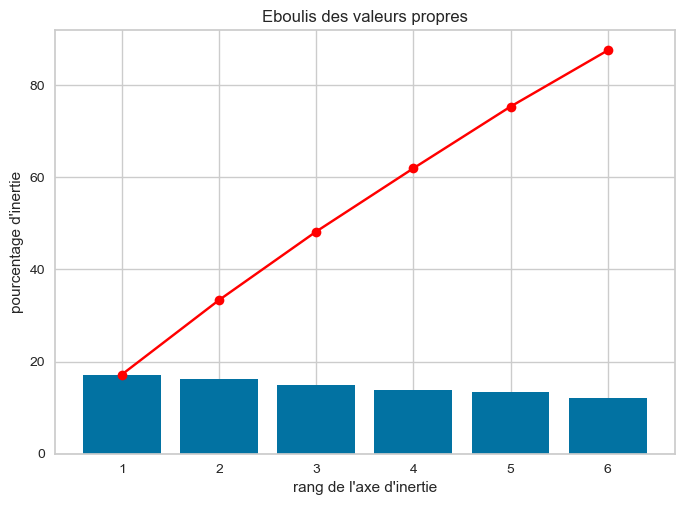

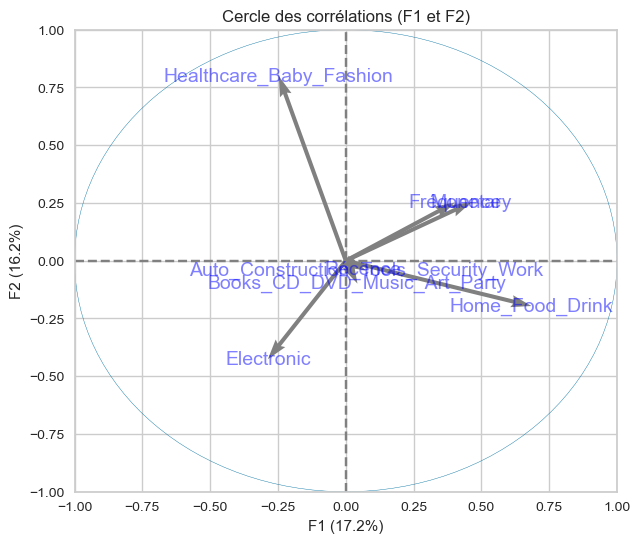

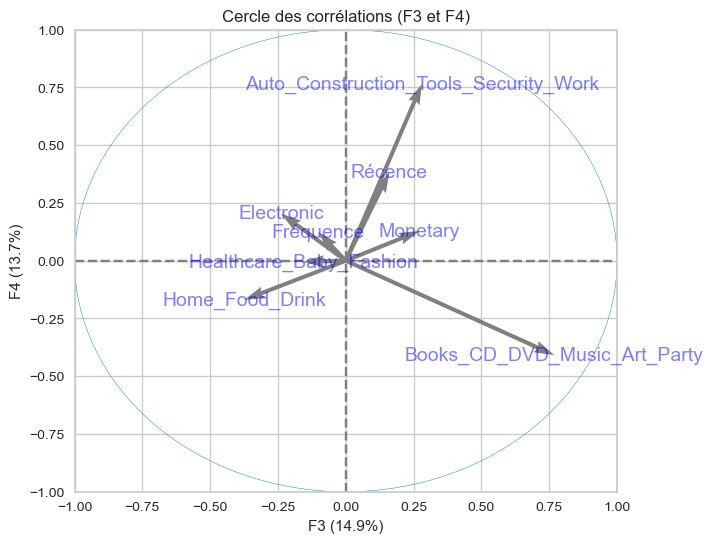

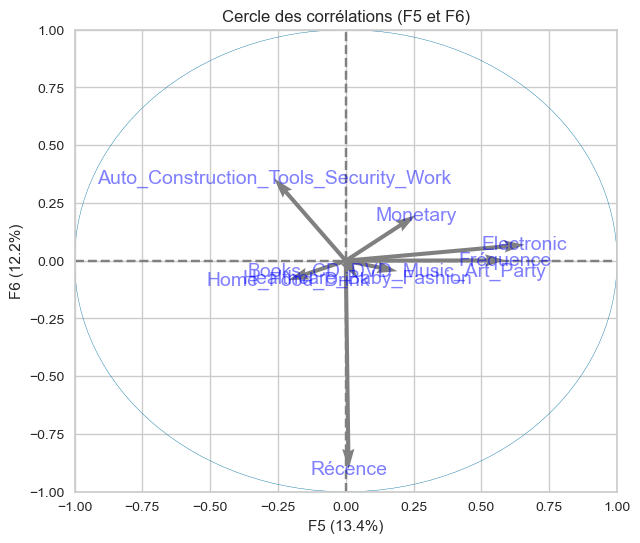

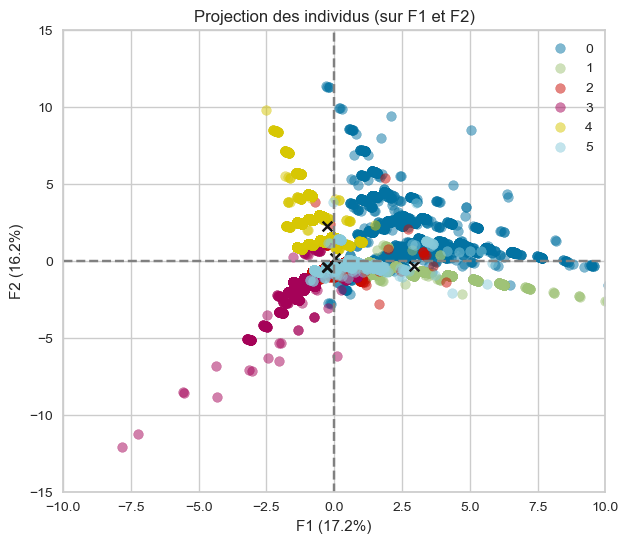

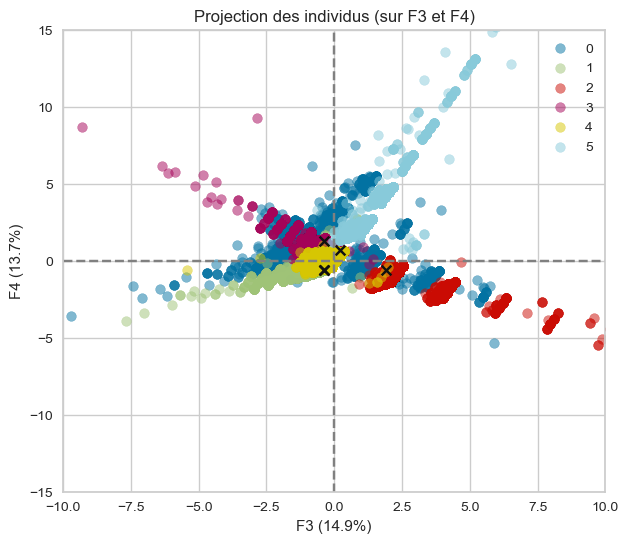

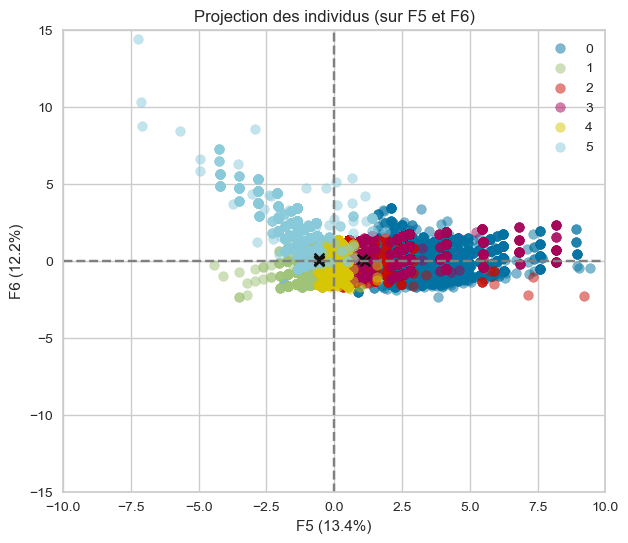

In [32]:
from sklearn import decomposition
from sklearn import preprocessing
from functions_Copy124 import *

# choix du nombre de composantes à calculer
n_comp =6

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df_customer_unique_id2[list_ACP4]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = df_customer_unique_id2[list_ACP4].index # ou data.index pour avoir les intitulés
features = df_customer_unique_id2[list_ACP4].columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
#display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))



### Projection des individus
#X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

#plt.show()

# Nutri_score grade :
category = [df_tests.loc[Id, 'category'] for Id in data_pca.index]


# Projection des individus

centers = kmeans.cluster_centers_

X_projected = pca.transform(X_scaled)
#display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = category, alpha = 0.5)

display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = category, alpha = 0.5,centroid=centers)



# Boxplots scenario 2 (list ACP4)

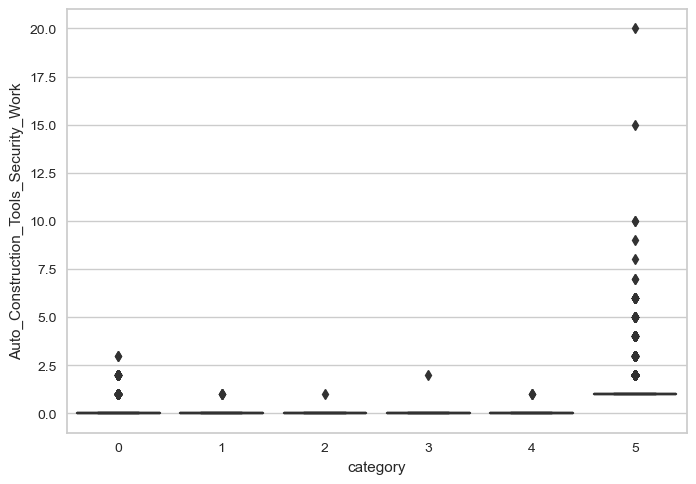

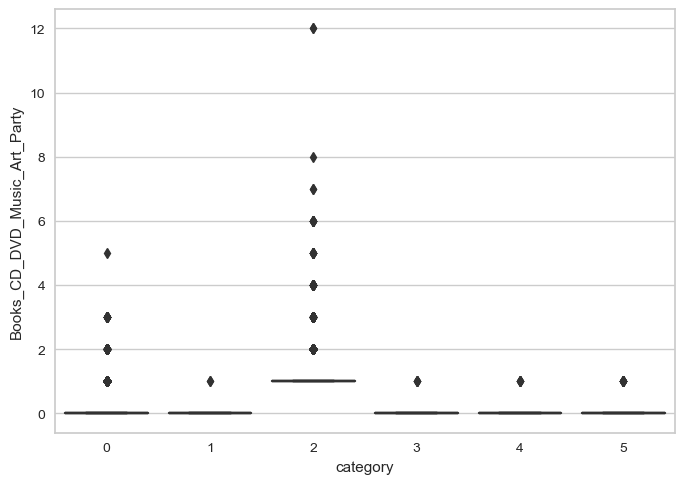

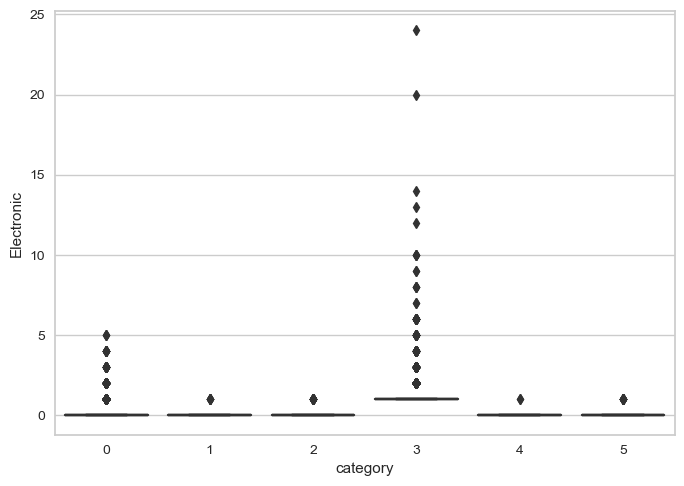

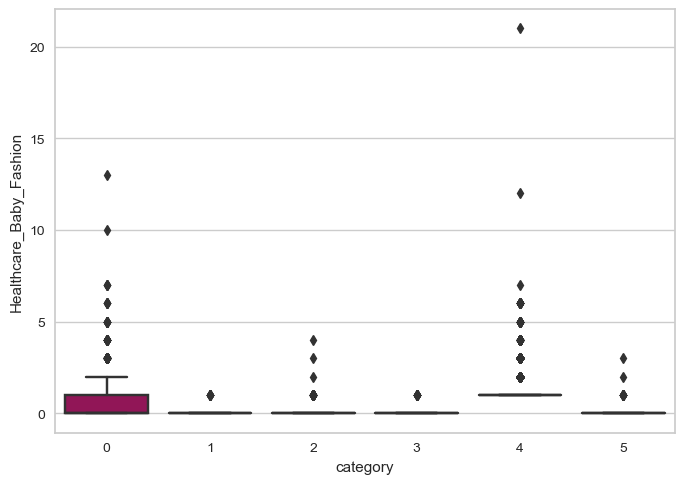

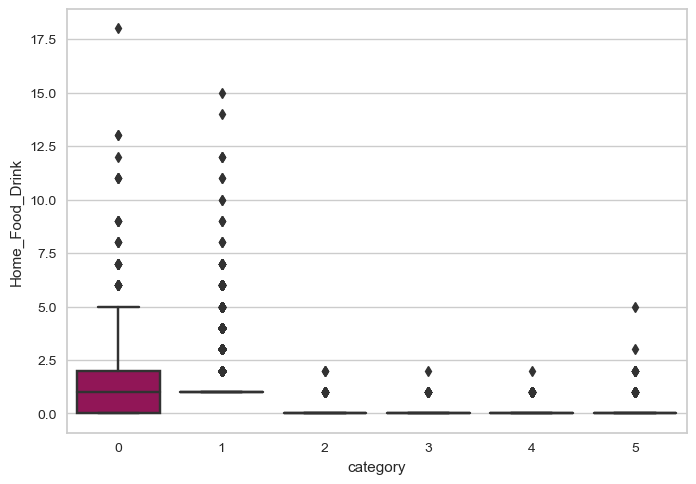

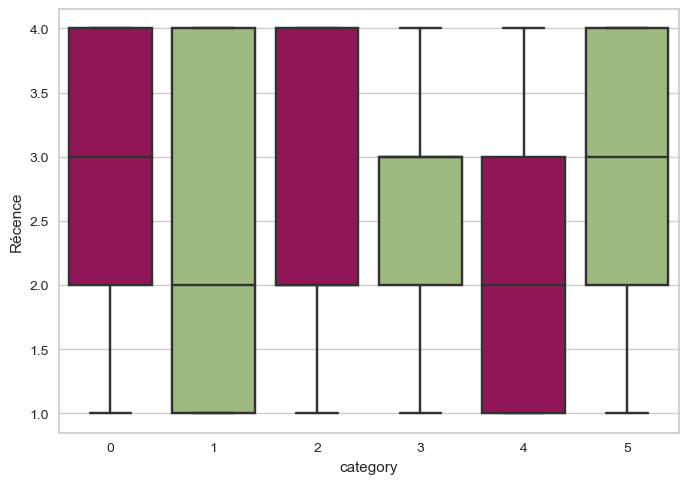

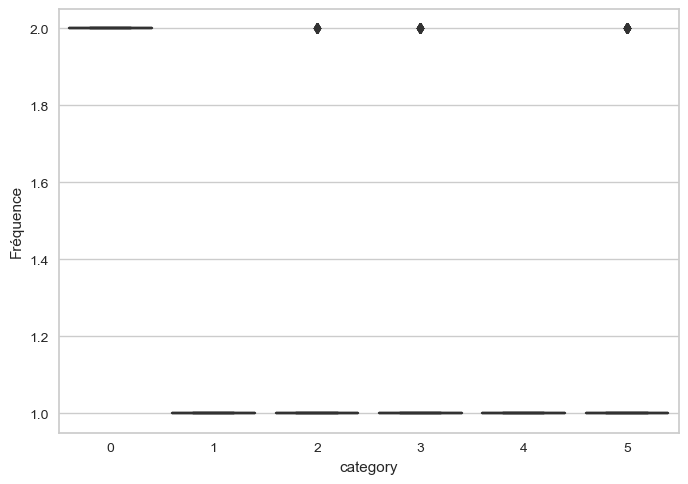

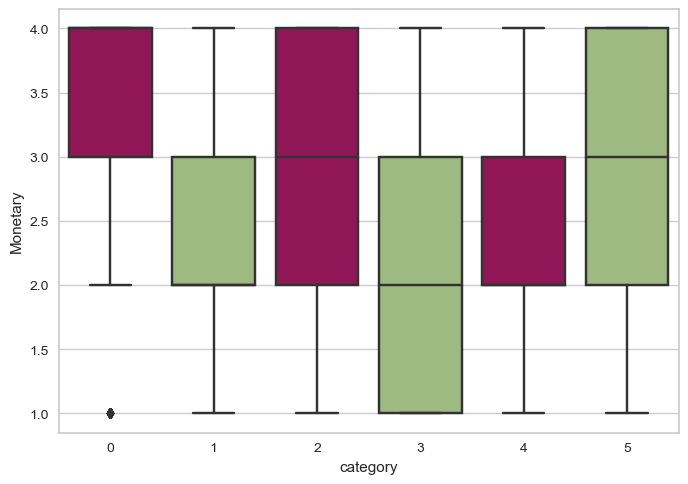

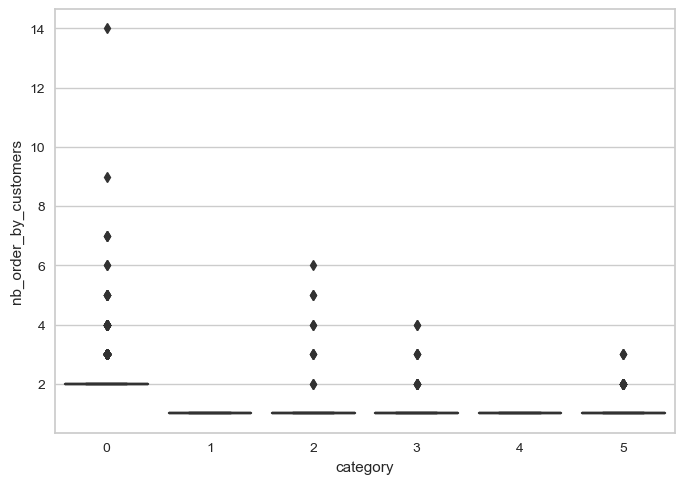

In [33]:
#Faire des boxplots de l'évolution des différentes variables de liste ACP 3 en fonction de la category de client

liste_alpha=[0,1,2,3,4,5]

yk2=list_ACP4+['nb_order_by_customers']

for i in yk2:
    sns.boxplot(x='category',y=i,palette=["m", "g"],order=liste_alpha,
            data=df_tests)

    plt.show()

# ARI SCORE

In [34]:
# prendre un k=6 par exemple
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html


In [35]:
df_tests

,first_order,customer_unique_id,customer_code_prefix,customer_city,customer_state,payment_installments,nb_of_items,boleto,credit_card,debit_card,voucher,price_per_customer,Auto_Construction_Tools_Security_Work,Books_CD_DVD_Music_Art_Party,Electronic,Healthcare_Baby_Fashion,Home_Food_Drink,nb_order_by_customers,last_purchase,first_order_date_2,last_order_date_2,Récence,Fréquence,Monetary,days_from_last_command,RFM_Cell,RFM_Score,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,LAT,LNG,GEO,NE,NW,SE,SW,"R,F,M",Segmentation,Segmentation_class,days_from_last_command_nb,category
0,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,S,E,SE,0,0,1,0,"2,2,2",A_risque,4,331.0,0
1,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,1.0,1,0,0,0,141.46,0,0,0,1,0,1,2018-07-26 03:24:27,2018-07-26,2018-07-26,4,1,3,34 days,"4,1,3",2.666667,-12.177924,-44.660711,barreiras,BA,N,E,NE,1,0,0,0,"4,1,3",Recent,2,34.0,4
2,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,3.0,1.0,0,1,0,0,179.12,1,0,0,0,0,1,2018-08-08 08:55:23,2018-08-08,2018-08-08,4,1,3,21 days,"4,1,3",2.666667,-16.745150,-48.514783,vianopolis,GO,N,W,NW,0,1,0,0,"4,1,3",Recent,2,21.0,5
3,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,1.0,0,1,0,0,72.20,0,0,0,0,1,1,2017-11-18 19:45:59,2017-11-18,2017-11-18,2,1,2,284 days,"2,1,2",1.666667,-5.774190,-35.271143,sao goncalo do amarante,RN,N,E,NE,1,0,0,0,"2,1,2",A_risque,4,284.0,1
4,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,1.0,0,1,0,0,28.62,0,1,0,0,0,1,2018-02-13 22:20:29,2018-02-13,2018-02-13,3,1,1,197 days,"3,1,1",1.666667,-23.676370,-46.514627,santo andre,SP,S,E,SE,0,0,1,0,"3,1,1",Recent,2,197.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91996,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,3.0,1.0,0,1,0,0,85.08,0,0,0,1,0,1,2017-03-09 09:54:05,2017-03-09,2017-03-09,1,1,2,538 days,"1,1,2",1.333333,-23.178000,-45.883818,são josé dos campos,SP,S,E,SE,0,0,1,0,"1,1,2",Lost,5,538.0,4
91997,2018-02-06 13:10:37,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,3.0,1.0,0,1,0,0,195.00,0,0,0,1,0,1,2018-02-06 13:10:37,2018-02-06,2018-02-06,3,1,4,204 days,"3,1,4",2.666667,-24.001500,-46.449864,praia grande,SP,S,E,SE,0,0,1,0,"3,1,4",Prometteurs,3,204.0,4
91998,2017-08-27 15:04:16,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,5.0,1.0,0,1,0,0,271.01,0,0,0,0,1,1,2017-08-27 15:04:16,2017-08-27,2017-08-27,1,1,4,367 days,"1,1,4",2.000000,-17.898358,-39.373630,nova vicosa,BA,N,E,NE,1,0,0,0,"1,1,4",Lost,5,367.0,1
91999,2018-01-08 21:36:21,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,4.0,2.0,0,2,0,0,661.74,0,0,2,0,0,1,2018-01-08 21:36:21,2018-01-08,2018-01-08,2,1,4,233 days,"2,1,4",2.333333,-22.562825,-42.694574,japuiba,RJ,S,E,SE,0,0,1,0,"2,1,4",A_risque,4,233.0,3


In [62]:
# FirstDate


df_tests['first_order_date_2']=df_tests['first_order'].astype(str).str[:10]

df_tests['first_order_date_3'] = pd.to_datetime(df_tests['first_order_date_2'],format='%Y-%m-%d')


# LastDate


df_tests['last_order_date']=df_tests['last_purchase'].astype(str).str[:10]

df_tests['last_order_date_2'] = pd.to_datetime(df_tests['last_order_date'],format='%Y-%m-%d')

In [69]:
date_mini=df_tests['first_order_date_3'].min()

date_maxi=df_tests['last_order_date_2'].max()
Delta_min_max=date_maxi-date_mini


date_maxi

Delta_min_max

date_mini

date_Q1=date_maxi - 6*Delta_min_max/22
date_Q2=date_maxi - 5*Delta_min_max/22
date_Q3=date_maxi - 4*Delta_min_max/22
date_Q4=date_maxi - 3*Delta_min_max/22
date_Q5=date_maxi - 2*Delta_min_max/22
date_Q6=date_maxi - 1*Delta_min_max/22

print(date_maxi)
print(date_Q1)
print(date_Q2)
print(date_Q3)
print(date_Q4)
print(date_Q5)
print(date_Q6)

2018-08-29 00:00:00
2018-02-20 17:27:16.363636364
2018-03-24 06:32:43.636363636
2018-04-24 19:38:10.909090910
2018-05-26 08:43:38.181818182
2018-06-26 21:49:05.454545455
2018-07-28 10:54:32.727272728


In [71]:
df_tests

,first_order,customer_unique_id,customer_code_prefix,customer_city,customer_state,payment_installments,nb_of_items,boleto,credit_card,debit_card,voucher,price_per_customer,Auto_Construction_Tools_Security_Work,Books_CD_DVD_Music_Art_Party,Electronic,Healthcare_Baby_Fashion,Home_Food_Drink,nb_order_by_customers,last_purchase,order_id,review_score,delivery_delay_number,geolocation_lat_x,geolocation_lng_x,geolocation_city_x,geolocation_state_x,LAT,LNG,GEO,first_order_date_2,last_order_date_2,Récence,Fréquence,Monetary,days_from_last_command,RFM_Cell,RFM_Score,geolocation_lat_y,geolocation_lng_y,geolocation_city_y,geolocation_state_y,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,NE,NW,SE,SW,"R,F,M",Segmentation,Segmentation_class,days_from_last_command_nb,product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts,category_KMeans,first_order_date_3,last_order_date
0,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,69923a4e07ce446644394df37a710286,5,1.0,-23.576983,-46.587161,sao paulo,SP,S,E,SE,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,-23.576983,-46.587161,sao paulo,SP,0,0,1,0,"2,2,2",A_risque,4,331.0,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2017-09-04,2017-10-02
1,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,69923a4e07ce446644394df37a710286,5,1.0,-23.576983,-46.587161,sao paulo,SP,S,E,SE,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,-23.576983,-46.587161,sao paulo,SP,0,0,1,0,"2,2,2",A_risque,4,331.0,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2017-09-04,2017-10-02
2,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,69923a4e07ce446644394df37a710286,5,1.0,-23.576983,-46.587161,sao paulo,SP,S,E,SE,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,-23.576983,-46.587161,sao paulo,SP,0,0,1,0,"2,2,2",A_risque,4,331.0,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2017-09-04,2017-10-02
3,2017-09-04 11:43:25,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,1.0,0,2,0,2,82.82,0,0,0,1,1,2,2017-10-02 11:07:15,69923a4e07ce446644394df37a710286,5,1.0,-23.576983,-46.587161,sao paulo,SP,S,E,SE,2017-09-04,2017-10-02,2,2,2,331 days,"2,2,2",2.000000,-23.576983,-46.587161,sao paulo,SP,-

In [83]:
from sklearn.metrics import adjusted_rand_score

# on va splitter le jeu de données en quatre jeu dans le temps.

date_mini=df_tests['first_order_date_3'].min()

date_maxi=df_tests['last_order_date_2'].max()

Delta_min_max=date_maxi-date_mini

date_med=date_mini+Delta_min_max/2

# le jeu de données est sur environ 22 mois. Delta_min_max/22 équivaut à un mois.

date_Q1=date_maxi - 6*Delta_min_max/22
date_Q2=date_maxi - 5*Delta_min_max/22
date_Q3=date_maxi - 4*Delta_min_max/22
date_Q4=date_maxi - 3*Delta_min_max/22
date_Q5=date_maxi - 2*Delta_min_max/22
date_Q6=date_maxi - 1*Delta_min_max/22



# Evolution 22mois-6mois=16 mois à 17 mois :

data1=df_tests[df_tests['first_order_date_3']<date_Q1]
data1=df_tests[df_tests['last_order_date_2']<date_Q1]

#data1_sample=data1.sample(n=4406, random_state=1)


# Evolution 22mois-6mois=16 mois à 17 mois :

data2=df_tests[df_tests['first_order_date_3']<date_Q2]
data2=df_tests[df_tests['last_order_date_2']<date_Q2]

#data2_sample=data2.sample(n=4406, random_state=1)


# Evolution 16 mois à 18 mois :

data3=df_tests[df_tests['first_order_date_3']<date_Q3]
data3=df_tests[df_tests['last_order_date_2']<date_Q3]

#data3_sample=data3.sample(n=4406, random_state=1)

# Evolution 16 mois à 19 mois :

data4=df_tests[df_tests['first_order_date_3']<date_Q4]
data4=df_tests[df_tests['last_order_date_2']<date_Q4]

#data4_sample=data4.sample(n=4406, random_state=1)



# Evolution 16 mois à 20 mois :

data5=df_tests[df_tests['first_order_date_3']<date_Q5]
data5=df_tests[df_tests['last_order_date_2']<date_Q5]

# Evolution 16 mois à 21 mois :

data6=df_tests[df_tests['first_order_date_3']<date_Q6]
data6=df_tests[df_tests['last_order_date_2']<date_Q6]

# Evolution 16 mois à 22 mois :





list_ACP10=['nb_order_by_customers','payment_installments','days_from_last_command_nb','price_per_customer','review_score','delivery_delay_number']



# centré normé

X1 = data1[list_ACP10].values
std_scale1=preprocessing.StandardScaler().fit(X1)
X_scaled1 = std_scale1.transform(X1)


X2 = data2[list_ACP10].values
std_scale2=preprocessing.StandardScaler().fit(X2)
X_scaled2 = std_scale2.transform(X2)


X3 = data3[list_ACP10].values
std_scale3=preprocessing.StandardScaler().fit(X3)
X_scaled3 = std_scale3.transform(X3)


X4 = data4[list_ACP10].values
std_scale4=preprocessing.StandardScaler().fit(X4)
X_scaled4 = std_scale4.transform(X4)


X5 = data5[list_ACP10].values
std_scale5=preprocessing.StandardScaler().fit(X5)
X_scaled5 = std_scale4.transform(X5)


X6 = data6[list_ACP10].values
std_scale6=preprocessing.StandardScaler().fit(X6)
X_scaled6 = std_scale6.transform(X6)


X7 = df_tests[list_ACP10].values
std_scale7=preprocessing.StandardScaler().fit(X7)
X_scaled7 = std_scale6.transform(X7)






predict1_2 = kmeans.fit(X_scaled1).predict(X_scaled2)
predict2_2 = kmeans.fit(X_scaled2).predict(X_scaled2)

predict1_3 = kmeans.fit(X_scaled1).predict(X_scaled3)
predict3_3 = kmeans.fit(X_scaled3).predict(X_scaled3)

predict1_4 = kmeans.fit(X_scaled1).predict(X_scaled4)
predict4_4 = kmeans.fit(X_scaled4).predict(X_scaled4)

predict1_5 = kmeans.fit(X_scaled1).predict(X_scaled4)
predict5_5 = kmeans.fit(X_scaled4).predict(X_scaled4)

predict1_6 = kmeans.fit(X_scaled1).predict(X_scaled4)
predict6_6 = kmeans.fit(X_scaled4).predict(X_scaled4)

predict1_7 = kmeans.fit(X_scaled1).predict(X_scaled4)
predict7_7 = kmeans.fit(X_scaled4).predict(X_scaled4)




ari1_2 = adjusted_rand_score(predict1_2, predict2_2)
ari1_3 = adjusted_rand_score(predict1_3, predict3_3)
ari1_4 = adjusted_rand_score(predict1_4, predict4_4)
ari1_5 = adjusted_rand_score(predict1_5, predict5_5)
ari1_6 = adjusted_rand_score(predict1_6, predict6_6)
ari1_7 = adjusted_rand_score(predict1_7, predict7_7)


liste_ari=[ari1_2,ari1_3,ari1_4,ari1_5,ari1_6,ari1_7]


In [84]:
for i in liste_ari :
    print(str(i), ":", i)


0.8156081239788555 : 0.8156081239788555
0.7894099820150055 : 0.7894099820150055
0.5546712475709122 : 0.5546712475709122
0.5546712475709122 : 0.5546712475709122
0.5546712475709122 : 0.5546712475709122
0.5546712475709122 : 0.5546712475709122


In [85]:
lignes = ['-5 mois','-4 mois','-3 mois','-2 mois','-1 mois','-0 mois']

In [87]:
ar = np.array(liste_ari)
df_final = pd.DataFrame(ar, index=lignes,columns=['ari'])

df_final

,ari
-5 mois,0.815608
-4 mois,0.789410
-3 mois,0.554671
-2 mois,0.554671
-1 mois,0.554671
-0 mois,0.554671


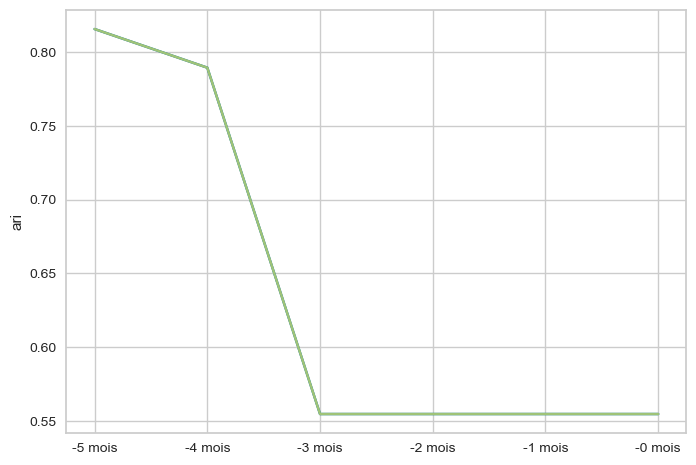

In [92]:
sns.lineplot(data=df_final, x=df_final.index, y="ari")
plt.show()

1.0

In [ ]:
X_scaled2

In [ ]:
# Modèle temps de calcul

start_time = timeit.default_timer()

    # blablabla

elapsed = timeit.default_timer() - start_time

print(elapsed)

In [ ]:
# modèel échantillonage

df_customer_unique_id3=df_customer_unique_id2.sample(frac=0.25, random_state=1)

row2 = data.sample(n = 1)